In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 78% 127M/163M [00:00<00:00, 1.33GB/s]
100% 163M/163M [00:00<00:00, 1.23GB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2593.jpg', 'with_mask_2925.jpg', 'with_mask_3504.jpg', 'with_mask_167.jpg', 'with_mask_3412.jpg']
['with_mask_1446.jpg', 'with_mask_374.jpg', 'with_mask_1406.jpg', 'with_mask_2363.jpg', 'with_mask_948.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2465.jpg', 'without_mask_2800.jpg', 'without_mask_3348.jpg', 'without_mask_1453.jpg', 'without_mask_330.jpg']
['without_mask_3164.jpg', 'without_mask_1745.jpg', 'without_mask_41.jpg', 'without_mask_3660.jpg', 'without_mask_260.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

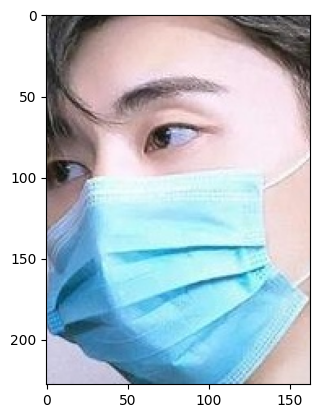

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

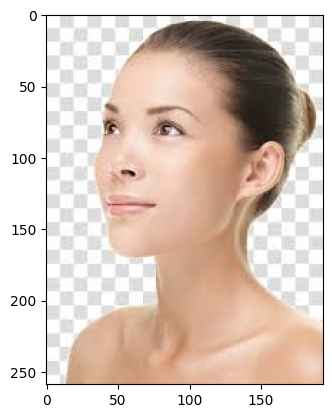

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[200, 197, 214],
        [200, 197, 214],
        [200, 197, 214],
        ...,
        [205, 209, 220],
        [206, 210, 221],
        [208, 210, 222]],

       [[200, 197, 214],
        [200, 197, 214],
        [200, 197, 214],
        ...,
        [205, 209, 220],
        [206, 210, 221],
        [208, 210, 222]],

       [[200, 197, 214],
        [200, 197, 214],
        [200, 197, 214],
        ...,
        [206, 208, 220],
        [207, 209, 221],
        [209, 210, 222]],

       ...,

       [[201, 204, 219],
        [201, 204, 219],
        [202, 204, 219],
        ...,
        [206, 208, 223],
        [206, 208, 223],
        [205, 207, 222]],

       [[201, 204, 219],
        [201, 204, 219],
        [202, 204, 219],
        ...,
        [206, 208, 223],
        [206, 208, 223],
        [205, 207, 222]],

       [[201, 204, 219],
        [201, 204, 219],
        [202, 204, 219],
        ...,
        [206, 208, 223],
        [205, 207, 222],
        [204, 206, 221]]], dtype=uint8)
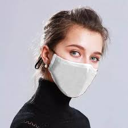

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 29,  17,   3],
        [ 29,  17,   3],
        [ 31,  20,   5],
        ...,
        [ 80,  47,  13],
        [ 74,  41,   8],
        [ 73,  40,   7]],

       [[ 31,  19,   5],
        [ 31,  19,   5],
        [ 32,  21,   6],
        ...,
        [ 79,  46,  12],
        [ 77,  44,  11],
        [ 76,  43,  10]],

       [[ 35,  23,   9],
        [ 35,  23,   9],
        [ 34,  23,   9],
        ...,
        [ 77,  44,  10],
        [ 81,  48,  15],
        [ 82,  49,  16]],

       ...,

       [[141,  96,  55],
        [140,  95,  54],
        [138,  93,  51],
        ...,
        [ 13,  23,   9],
        [ 12,  22,   8],
        [ 12,  22,   8]],

       [[145,  98,  58],
        [144,  97,  57],
        [142,  94,  53],
        ...,
        [ 17,  25,  13],
        [ 16,  25,  12],
        [ 16,  25,  12]],

       [[148,  99,  59],
        [147,  98,  58],
        [144,  95,  54],
        ...,
        [ 19,  26,  15],
        [ 19,  26,  14],
        [ 19,  26,  14]]], dtype=uint8)
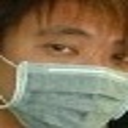

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.11372549, 0.06666667, 0.01176471],
        [0.11372549, 0.06666667, 0.01176471],
        [0.12156863, 0.07843137, 0.01960784],
        ...,
        [0.31372549, 0.18431373, 0.05098039],
        [0.29019608, 0.16078431, 0.03137255],
        [0.28627451, 0.15686275, 0.02745098]],

       [[0.12156863, 0.0745098 , 0.01960784],
        [0.12156863, 0.0745098 , 0.01960784],
        [0.1254902 , 0.08235294, 0.02352941],
        ...,
        [0.30980392, 0.18039216, 0.04705882],
        [0.30196078, 0.17254902, 0.04313725],
        [0.29803922, 0.16862745, 0.03921569]],

       [[0.1372549 , 0.09019608, 0.03529412],
        [0.1372549 , 0.09019608, 0.03529412],
        [0.13333333, 0.09019608, 0.03529412],
        ...,
        [0.30196078, 0.17254902, 0.03921569],
        [0.31764706, 0.18823529, 0.05882353],
        [0.32156863, 0.19215686, 0.0627451 ]],

       ...,

       [[0.55294118, 0.37647059, 0.21568627],
        [0.54901961, 0.37254902, 0.21176471],
        [0.54117647, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - acc: 0.7019 - loss: 0.6315 - val_acc: 0.8843 - val_loss: 0.2768
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - acc: 0.8809 - loss: 0.3000 - val_acc: 0.9074 - val_loss: 0.2387
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9111 - loss: 0.2332 - val_acc: 0.8909 - val_loss: 0.2686
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9226 - loss: 0.2027 - val_acc: 0.9388 - val_loss: 0.1627
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9480 - loss: 0.1517 - val_acc: 0.9273 - val_loss: 0.2156


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9212 - loss: 0.2016
Test Accuracy = 0.9185969829559326


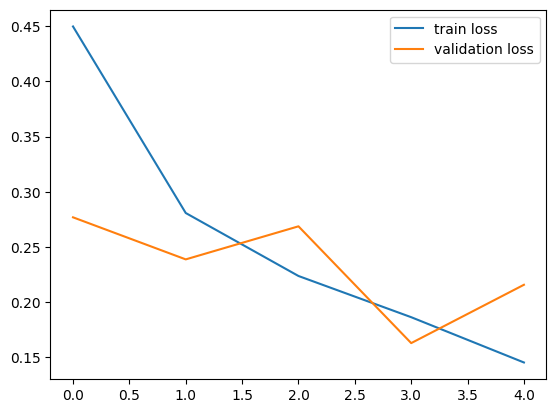

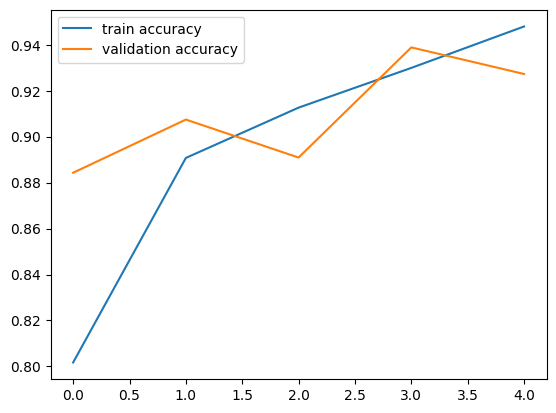

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/OIP.jpeg


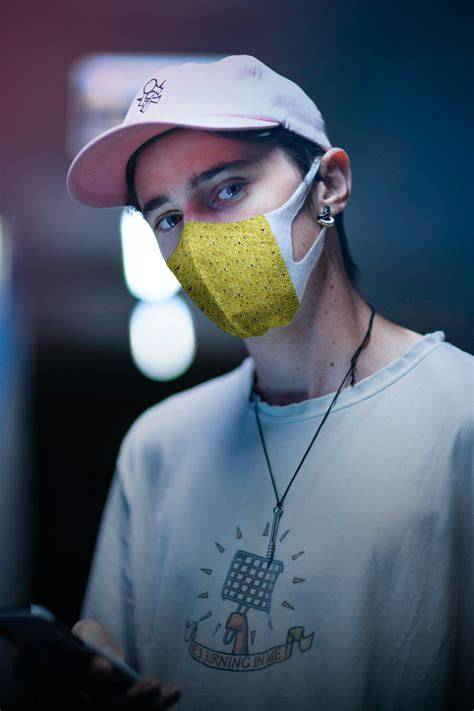

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step
[[0.5378374 0.5423942]]
1
The person in the image is wearing a mask


In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/OIP.jpeg


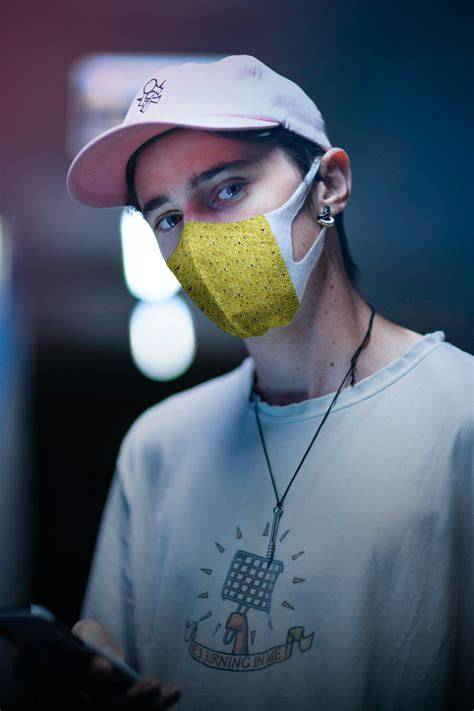

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.5378374 0.5423942]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')